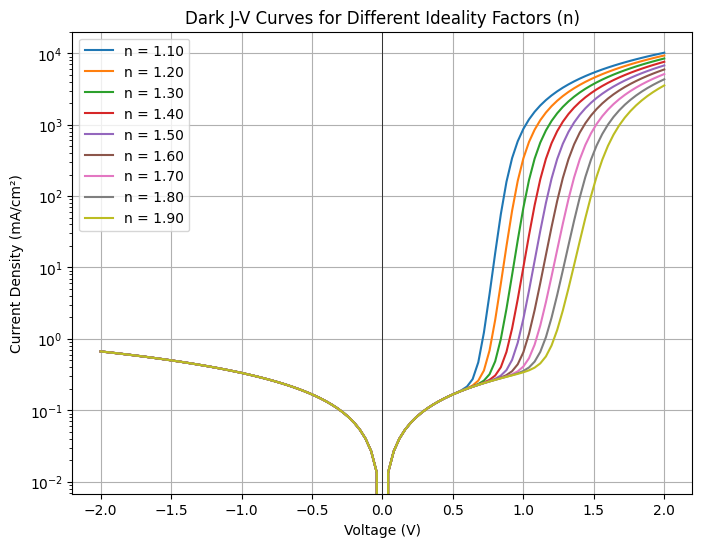

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.constants import e, k

T = 300 # K
Vt = k * T / e # V

def dark_diode_current_density(v, Js, Rs, Rsh, n):
    def equation(J):
        return J - Js * (np.exp((v - J * Rs) / (n * Vt)) - 1) - (v - J * Rs) / Rsh
    J = fsolve(equation, v / Rsh)
    return J[0]

J0 = 1e-14        # Saturation Current Density (A/cm2) 
Rs0 = 0.1       # Series Resistance (Ω/cm2)
Rsh0 = 3000     # Shunt Resistance (Ω/cm2) 
n0 = 1.35        # ideality factor (n)

V = np.linspace(-2, 2, 101)

plt.figure(figsize=(8, 6))

for n in np.linspace(1.1, 1.9, 9):
    J = np.array([dark_diode_current_density(v, J0, Rs0, Rsh0, n) for v in V])
    plt.plot(V, np.abs(J)*1e3, label=f'n = {n:.2f}') 

plt.xlabel('Voltage (V)')
plt.ylabel('Current Density (mA/cm²)')
plt.yscale("log")
plt.title('Dark J-V Curves for Different Ideality Factors (n)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend() 
plt.show()

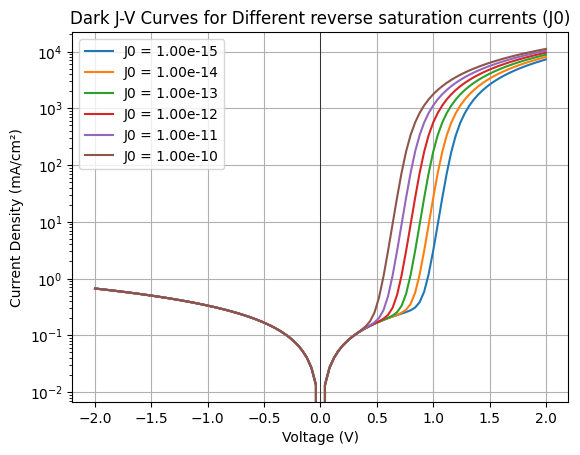

In [2]:

for Js in np.logspace(-15, -10, 6):
    J = np.array([dark_diode_current_density(v, Js, Rs0, Rsh0, n0) for v in V])
    plt.plot(V, np.abs(J)*1e3, label=f'J0 = {Js:.2e}') 

plt.xlabel('Voltage (V)')
plt.ylabel('Current Density (mA/cm²)')
plt.yscale("log")
plt.title('Dark J-V Curves for Different reverse saturation currents (J0)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

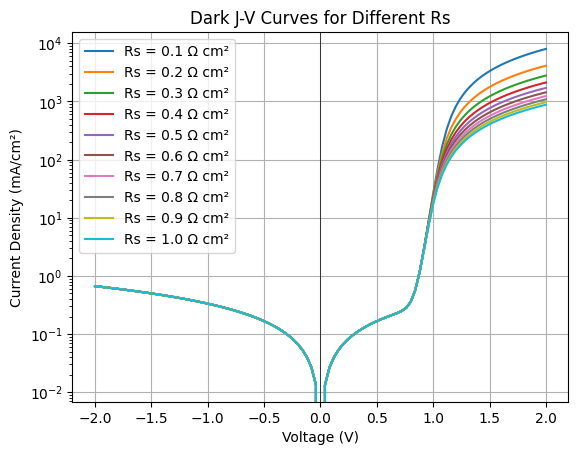

In [3]:
for Rs in np.linspace(.1, 1, 10):
    J = np.array([dark_diode_current_density(v, J0, Rs, Rsh0, n0) for v in V])
    plt.plot(V, np.abs(J)*1e3, label=f'Rs = {Rs:.1f} Ω cm²') 

plt.xlabel('Voltage (V)')
plt.ylabel('Current Density (mA/cm²)')
plt.yscale("log")
plt.title('Dark J-V Curves for Different Rs')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

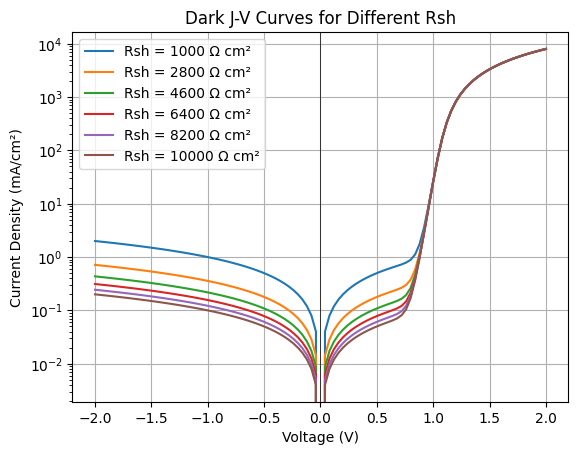

In [4]:
for Rsh in np.linspace(1000, 10000, 6):
    J = np.array([dark_diode_current_density(v, J0, Rs0, Rsh, n0) for v in V])
    plt.plot(V, np.abs(J)*1e3, label=f'Rsh = {Rsh:.0f} Ω cm²')

plt.xlabel('Voltage (V)')
plt.ylabel('Current Density (mA/cm²)')
plt.yscale("log")
plt.title('Dark J-V Curves for Different Rsh')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()